In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ECGXMLReader.ECGXMLReader import ECGXMLReader

In [18]:
DATA_BASE_PATH = "/mnt/cluster_vsbud-dl1-005/hackathon"

In [19]:
file_names = os.listdir(DATA_BASE_PATH)

ecg = ECGXMLReader(f'{DATA_BASE_PATH}/{file_names[3]}', augmentLeads=True)

In [22]:
patient_demographics = [0]
test_demographics = [0]

# for fname in file_names:
ecg = ECGXMLReader(f'{DATA_BASE_PATH}/{file_names[10]}', augmentLeads=True)
    

In [25]:
ecg.Waveforms[0]

{'WaveformType': 'Median',
 'WaveformStartTime': '0',
 'NumberofLeads': '8',
 'SampleType': 'CONTINUOUS_SAMPLES',
 'SampleBase': '500',
 'SampleExponent': '0',
 'HighPassFilter': '16',
 'LowPassFilter': '150',
 'ACFilter': '50',
 'LeadData': [{'LeadByteCountTotal': '1200',
   'LeadTimeOffset': '0',
   'LeadSampleCountTotal': '600',
   'LeadAmplitudeUnitsPerBit': '4.88',
   'LeadAmplitudeUnits': 'MICROVOLTS',
   'LeadHighLimit': '32767',
   'LeadLowLimit': '-32768',
   'LeadID': 'I',
   'LeadOffsetFirstSample': '0',
   'FirstSampleBaseline': '0',
   'LeadSampleSize': '2',
   'LeadOff': 'FALSE',
   'BaselineSway': 'FALSE',
   'LeadDataCRC32': '435095762',
   'WaveFormData': 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQAJAAkABwAFAAUA\nBgAHAAgACAAKAAwADAALAAoACgALAAsACwAKAA

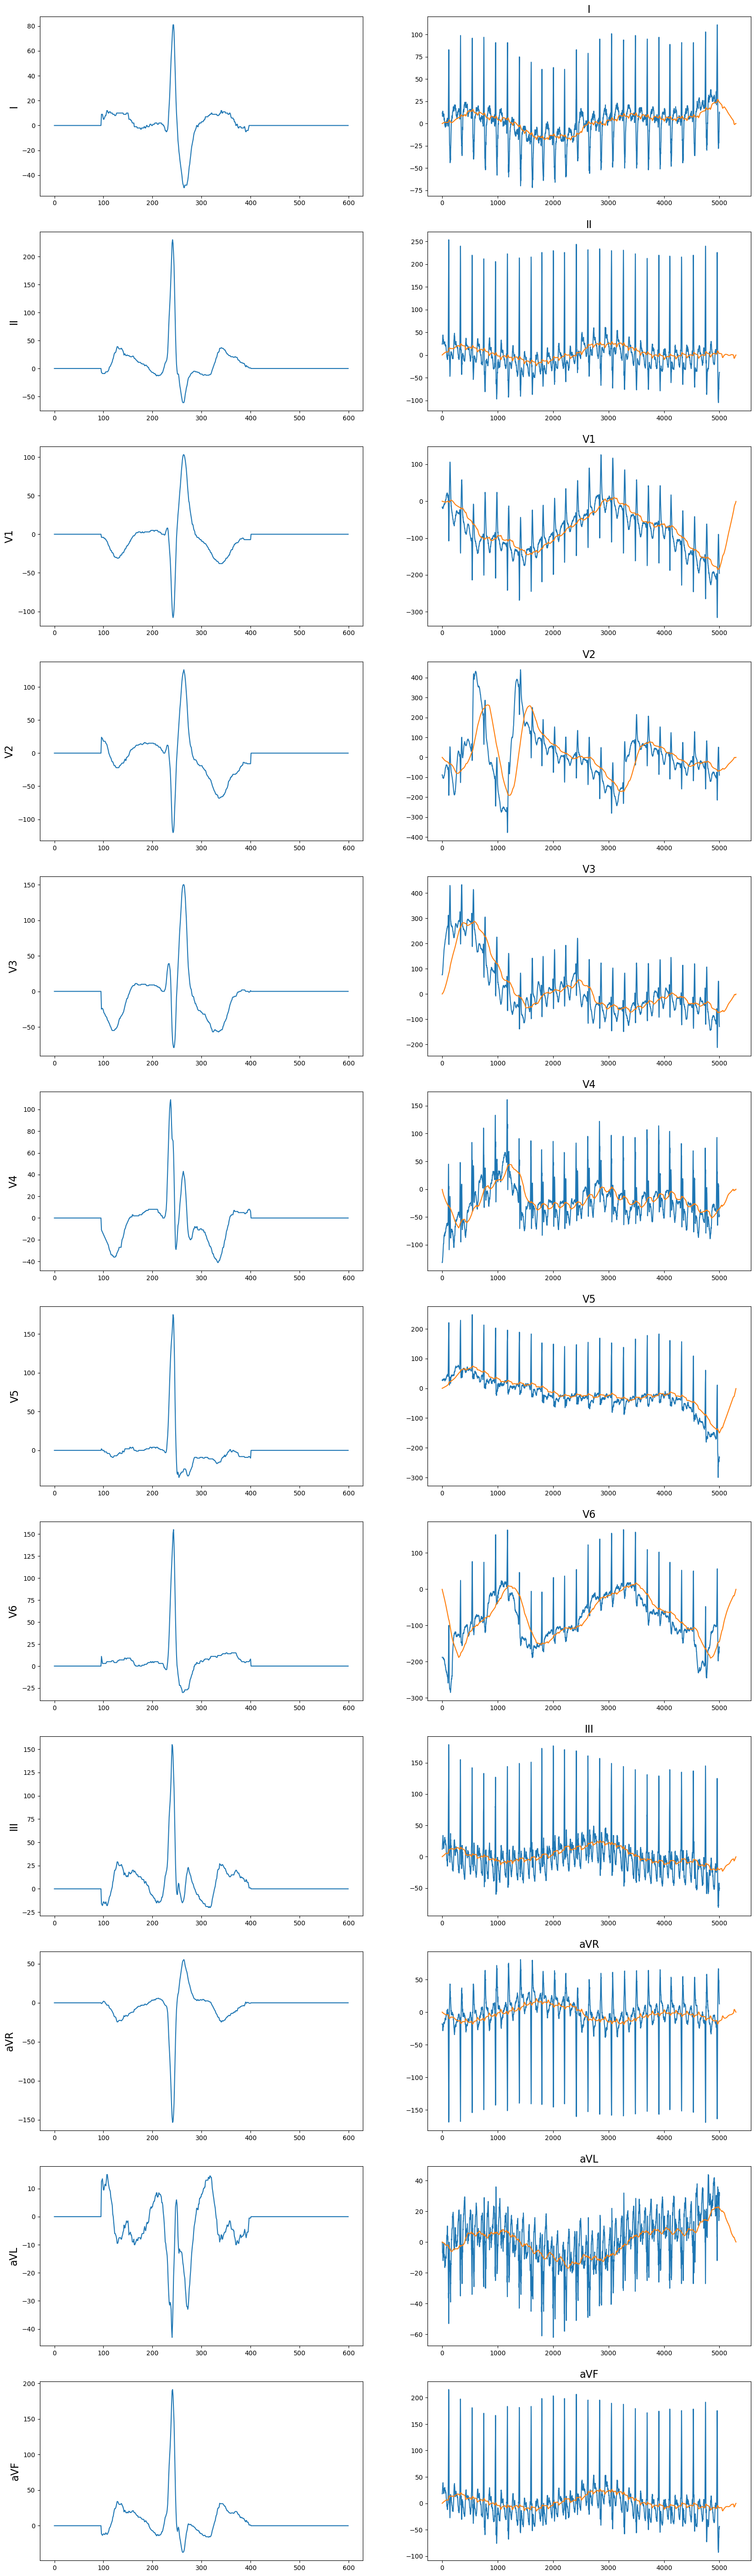

In [30]:
nrow = len(ecg.LeadVoltages[0])
fig, axs = plt.subplots(nrow, 2, figsize=(20, nrow*6))

for i, (key, voltages) in enumerate(ecg.LeadVoltages[0].items()):
    
    ax = axs[i, 0]
    
    ax.plot(voltages)
    ax.set_ylabel(key, fontsize=16)
    
for i, (key, voltages) in enumerate(ecg.LeadVoltages[1].items()):
    
    ax = axs[i, 1]
    
    ax.plot(voltages)
    ax.plot(np.convolve(np.ones(300)/300, voltages))
    ax.set_title(key, fontsize=16)
    
plt.show()